# Mohammed Raza (MCS231004)

In [1]:
# Importing necessary libraries for time series analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

In [3]:
# Step 1: Load the dataset
data = pd.read_csv('timeseries.csv', parse_dates=['date'])  # Adjust column name as needed
data.info()  # Quick look at the data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     104 non-null    int64         
 1   week           104 non-null    int64         
 2   year           104 non-null    int64         
 3   date           104 non-null    datetime64[ns]
 4   total_revenue  104 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 4.2 KB


In [4]:
# Step 2: Convert date column to DateTime if not already
data['date'] = pd.to_datetime(data['date'])

# Step 3: Set the 'date' column as the index
data.set_index('date', inplace=True)

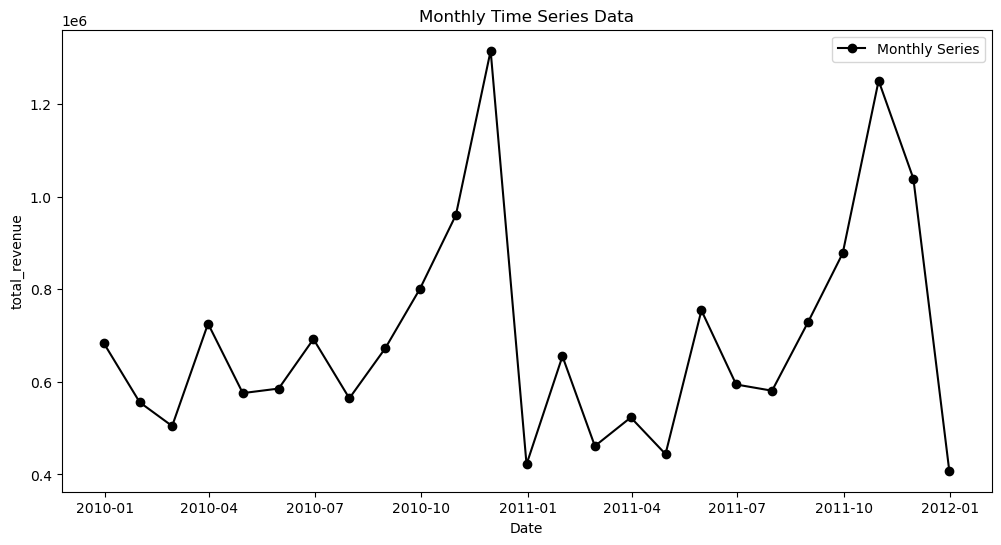

In [7]:
# Step 4: Aggregate data by month for monthly analysis (resample method)
# Assuming the column 'value' holds the time series data (adjust as necessary)
monthly_series = data['total_revenue'].resample('M').sum()

# Plot the time series data to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_series, marker='o', linestyle='-', color='black', label='Monthly Series')
plt.title('Monthly Time Series Data')
plt.xlabel('Date')
plt.ylabel('total_revenue')
plt.legend()
plt.show()

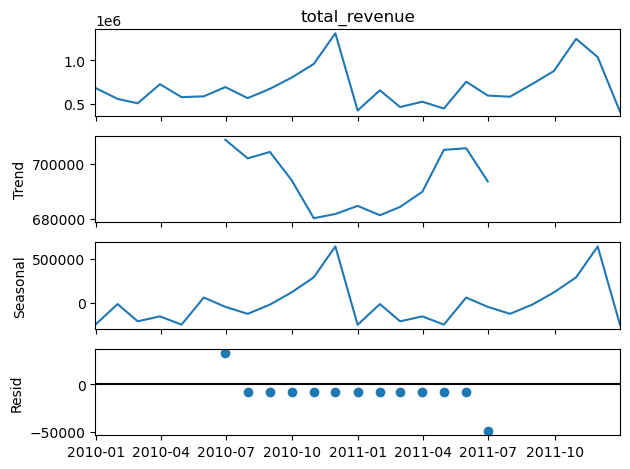

In [8]:
# Step 5: Perform seasonal decomposition to observe trend, seasonality, and residuals
components = sm.tsa.seasonal_decompose(monthly_series, model='additive')
components.plot()
plt.show()

In [9]:
# Step 6: Check stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(monthly_series.dropna(), autolag='AIC')
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
if adf_result[1] <= 0.05:
    print("The series is stationary (reject null hypothesis).")
else:
    print("The series is non-stationary (fail to reject null hypothesis). Consider differencing.")

ADF Statistic: -3.653870927937982
p-value: 0.004810825531839858
The series is stationary (reject null hypothesis).


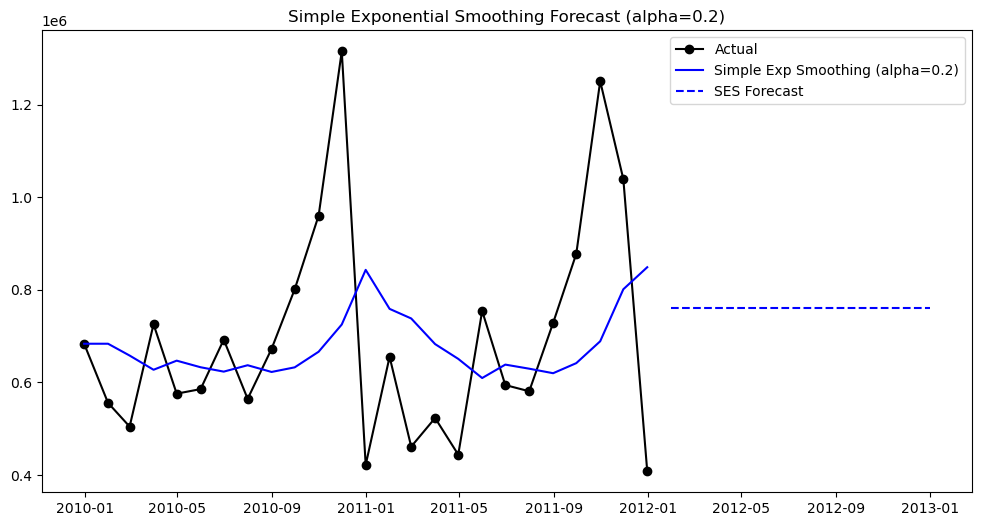

In [28]:
# Step 7a: Apply Simple Exponential Smoothing for forecasting
fit_simple = SimpleExpSmoothing(monthly_series).fit(smoothing_level=0.2, optimized=False)
fcast_simple = fit_simple.forecast(steps=12)  # Forecast next 12 months

# Plot for Simple Exponential Smoothing
plt.figure(figsize=(12, 6))
plt.plot(monthly_series, label='Actual', marker='o', color='black')
plt.plot(fit_simple.fittedvalues, label='Simple Exp Smoothing (alpha=0.2)', color='blue')
plt.plot(fcast_simple, label='SES Forecast', color='blue', linestyle='--')
plt.title('Simple Exponential Smoothing Forecast (alpha=0.2)')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6896\3682027393.py:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit_holt = Holt(monthly_series).fit(smoothing_level=0.3, smoothing_slope=0.1, optimized=True)
C:\Users\HP\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


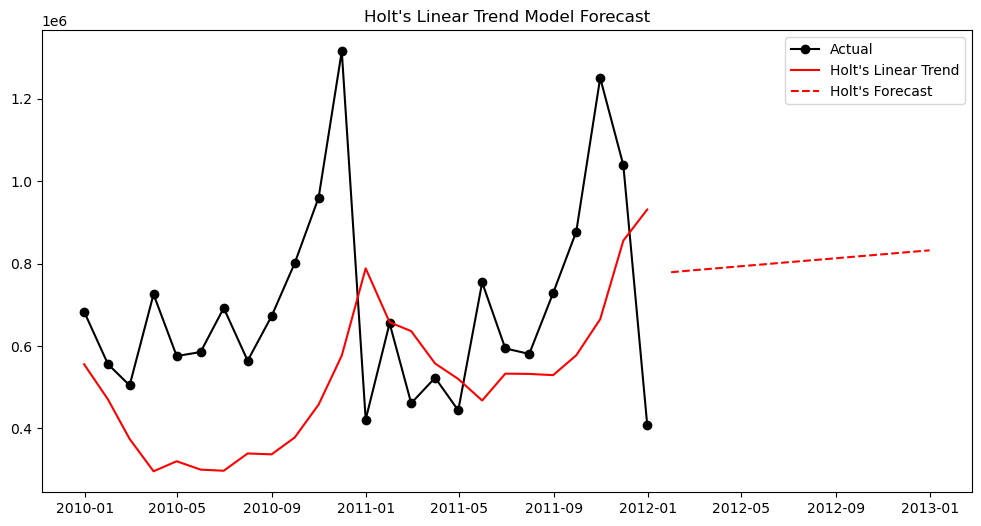

In [33]:
# Step 7b: Apply Holt's Linear Trend Model for forecasting
fit_holt = Holt(monthly_series).fit(smoothing_level=0.3, smoothing_slope=0.1, optimized=True)
fcast_holt = fit_holt.forecast(steps=12)  # Forecast next 12 months

# Plot for Holt's Linear Trend Model
plt.figure(figsize=(12, 6))
plt.plot(monthly_series, label='Actual', marker='o', color='black')
plt.plot(fit_holt.fittedvalues, label="Holt's Linear Trend", color='red')
plt.plot(fcast_holt, label="Holt's Forecast", color='red', linestyle='--')
plt.title("Holt's Linear Trend Model Forecast")
plt.legend()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


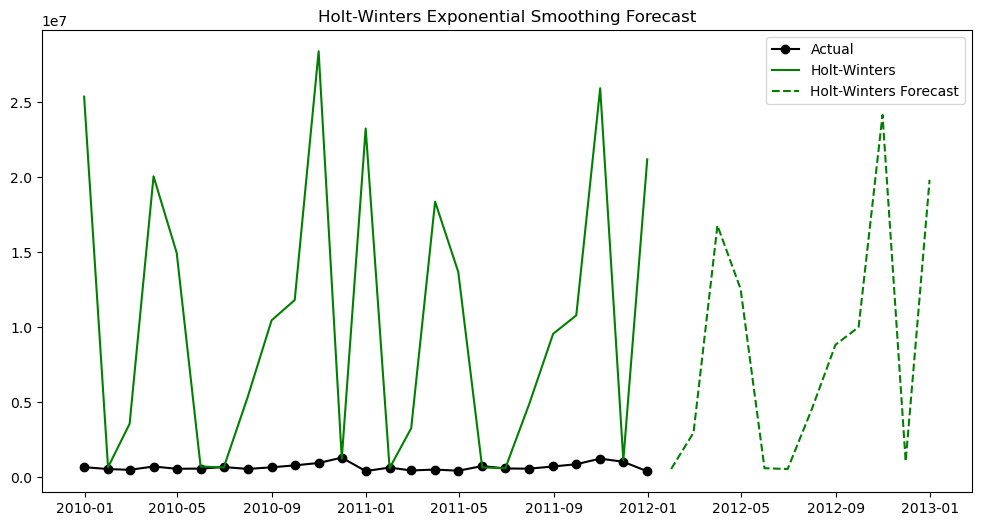

In [19]:
# Step 7c: Apply Winter's Exponential Smoothing (Holt-Winters Model)
fit_winters = ExponentialSmoothing(
    monthly_series, trend='add', seasonal='mul', seasonal_periods=12
).fit()
fcast_winters = fit_winters.forecast(steps=12)  # Forecast next 12 months

# Plot for Winter's Exponential Smoothing Model
plt.figure(figsize=(12, 6))
plt.plot(monthly_series, label='Actual', marker='o', color='black')
plt.plot(fit_winters.fittedvalues, label='Holt-Winters', color='green')
plt.plot(fcast_winters, label='Holt-Winters Forecast', color='green', linestyle='--')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [25]:
# Step 8: Evaluate model performance with MAE and MSE
mae_simple = np.mean(np.abs(monthly_series - fit_simple.fittedvalues))
mse_simple = np.mean((monthly_series - fit_simple.fittedvalues) ** 2)
print(f'Simple Exp Smoothing - MAE: {mae_simple}, MSE: {mse_simple}')

mae_holt = np.mean(np.abs(monthly_series - fit_holt.fittedvalues))
mse_holt = np.mean((monthly_series - fit_holt.fittedvalues) ** 2)
print(f"Holt's Linear Trend - MAE: {mae_holt}, MSE: {mse_holt}")

mae_winters = np.mean(np.abs(monthly_series - fit_winters.fittedvalues))
mse_winters = np.mean((monthly_series - fit_winters.fittedvalues) ** 2)
print(f"Holt-Winters - MAE: {mae_winters}, MSE: {mse_winters}")

Simple Exp Smoothing - MAE: 180467.076583785, MSE: 67531373475.12162
Holt's Linear Trend - MAE: 270941.13036697207, MSE: 108255331935.82549
Holt-Winters - MAE: 9608629.534514863, MSE: 177840084501677.6


# Summary of Model Performance:
The evaluation metrics indicate that while the Simple Exponential Smoothing model has a relatively low MAE and MSE, suggesting decent performance, Holt's Linear Trend model shows higher errors, indicating less accurate trend fitting. The Holt-Winters model, despite being more complex, has significantly higher MAE and MSE, which may suggest potential overfitting or issues with seasonal parameter tuning.
